In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import metpy.calc as mp
from metpy.units import units
from windrose import WindroseAxes
import matplotlib.cm as cm

def pmelTransport(files):
    bigDs = []
    fig = plt.figure(figsize=(18,8))
    for file in files:
        ds = xr.open_dataset(file,decode_times=False)
        times = ds.time.values+ds.time2.values/1000/60/60/24
        t2 = [Time(time,format='jd').iso for time in times]
        ds['time3'] = pd.to_datetime(t2)
        ds = ds.where(ds.v_1206<1000)
        #plt.plot(ds.time3,np.cumsum(np.ravel(ds.sel(depth=20).v_1206)))
        #plt.ylim(-10000,100000)
        bigDs.append(ds)
    return bigDs

def readTracks(file):
    dfTracks = pd.read_csv(file)
    dfTracks['Date_S'] = dfTracks['Date_S'].astype(str)
    dfTracks['Datetime'] = pd.to_datetime(dfTracks['Date_S'] + ' ' + dfTracks['Time_S'])
    dfTracks = dfTracks.drop(['Date_S','Time_S'], axis=1)
    dfTracks = dfTracks.set_index('Datetime')
    return dfTracks

def plotADCP(bigDS):
    d = []
    speed = []
    for i in range(len(bigDs)):
        curADCP = bigDs[i].sel(depth=24)#,time3=slice("2018-07-01", "2019-09-30"))
        d.append(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')))
        speed.append(np.ravel(mp.wind_speed(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'))))
    ax = WindroseAxes.from_ax()
    #ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude,  bins=np.arange(0, 5, 100), cmap=cm.Greys_r)
    ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude, normed=True,bins=np.arange(0, 41, 5), cmap=cm.plasma)
    ax.set_yticks([0,5,10,15,20,25,30])
    ax.set_yticklabels(['0','5','10','15','20','25','30'],fontsize=14)
    ax.set_rlabel_position(330)
    #ax.set_theta_zero_location("N")  # theta=0 at the top
    #ax.set_theta_direction(-1)  # theta increasing clockwise
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    ax.set_xticklabels(['90${\degree}$', '45${\degree}$', '0${\degree}$', '315${\degree}$', '270${\degree}$', '225${\degree}$', '180${\degree}$', '135${\degree}$']);
        
def plotTracks(dfCur):
    ax = WindroseAxes.from_ax()
    #ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude,  bins=np.arange(0, 5, 100), cmap=cm.Greys_r)
    ax.bar(dfCur.directHead, dfCur.directSpeed*100, normed=True,bins=np.arange(0, 41, 5), cmap=cm.plasma)
    ax.set_yticks([0,5,10,15,20,25,30])
    ax.set_yticklabels(['0','5','10','15','20','25','30'],fontsize=14)
    ax.set_rlabel_position(330)
    #ax.set_theta_zero_location("N")  # theta=0 at the top
    #ax.set_theta_direction(-1)  # theta increasing clockwise
    #xlabels = ('N','N-E','E','S-E','S','S-O','O','N-O')
    #ax.set_xticklabels(xlabels);
    #ax.set_xticks(xticks)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    ax.set_xticklabels(['90${\degree}$', '45${\degree}$', '0${\degree}$', '315${\degree}$', '270${\degree}$', '225${\degree}$', '180${\degree}$', '135${\degree}$']);
        
D1_4 = ['../data/physicalData/PMEL_2017_17ckp11a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp11a_wcp_vel.nc']
D2_5 = ['../data/physicalData/PMEL_2017_17ckp1a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp1a_wcp_vel.nc']
D6 = ['../data/physicalData/PMEL_2018_18ckp4a_wcp_vel.nc']

df1 = readTracks('../data/analysisFiles/TrackRegions1_linear2.csv')
#df1['linearHead'] = df1.linearHead+20
df2 = readTracks('../data/analysisFiles/TrackRegions2_linear2.csv')
df4 = readTracks('../data/analysisFiles/TrackRegions4_linear2.csv')
df5 = readTracks('../data/analysisFiles/TrackRegions5_linear2.csv')
df6 = readTracks('../data/analysisFiles/TrackRegions6_linear2.csv')

In [5]:
a = pmelTransport(D1_4)[0]
a

<xarray.Dataset>
Dimensions:    (depth: 7, latitude: 1, longitude: 1, time: 8804, time3: 8804)
Coordinates:
  * time       (time) int32 2457976 2457976 2457976 ... 2458342 2458342 2458342
  * depth      (depth) float32 8.0 12.0 16.0 20.0 24.0 28.0 32.0
  * latitude   (latitude) float32 70.02
  * longitude  (longitude) float32 166.8
  * time3      (time3) datetime64[ns] 2017-08-10T12:00:00 ... 2018-08-12T07:0...
Data variables:
    time2      (time, depth, latitude, longitude) float64 0.0 0.0 ... 6.84e+07
    v_1206     (time, depth, latitude, longitude) float32 0.09714 ... 3.364
    u_1205     (time, depth, latitude, longitude) float32 0.625 -2.104 ... 9.494
    w_1204     (time, depth, latitude, longitude) float32 1.6 0.9 ... 0.0 -0.2
    Werr_1201  (time, depth, latitude, longitude) float32 -1.8 -1.1 ... -0.2
Attributes:
    CREATION_DATE:        10:01 21-NOV-2018
    COMPOSITE:            1
    INST_TYPE:            wcp
    DATA_CMNT:            1792.VEL
    EPIC_FILE_GENERATOR:  adcp2nc.py V0.2.0
    PROG_CMNT01:          
    EDIT_CMNT01:          
    WATER_DEPTH:          47.0
    MOORING:              17CKP-11A
    WATER_MASS:           B
    EXPERIMENT:           
    PROJECT:              
    DECLINATION_CORR:     9.6
    SERIAL_NUMBER:        
    PROG_CMNT1:           trim_epic_unix (v1.2, rev 25Oct95)

<Figure size 1296x576 with 0 Axes>

0.2364616 5.474438
0.19715984 7.644589
-0.8102799 6.3440638
-1.7255119 8.812333
-8.223712 2.0102406


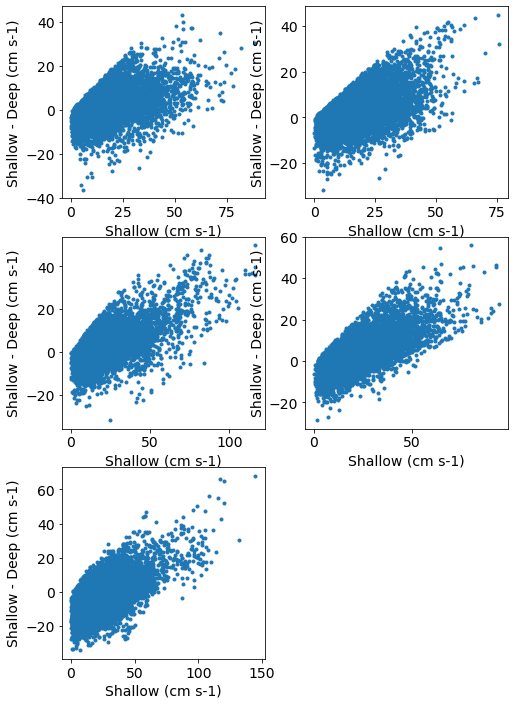

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [135]:
ct = 1
fig = plt.figure(figsize = (8,12))
for bigDs in [pmelTransport(D1_4)[0],pmelTransport(D1_4)[1],pmelTransport(D2_5)[0],pmelTransport(D2_5)[1],pmelTransport(D6)[0]]:
    deep = bigDs.sel(depth=bigDs.depth.values.max())
    shallow = bigDs.sel(depth=bigDs.depth.values.min())
    mn = bigDs.mean(dim='depth')
    d1 = np.ravel(mp.wind_speed(np.ravel(deep.u_1205)*units('cm/s'),np.ravel(deep.v_1206)*units('cm/s'))).magnitude
    d2 = np.ravel(mp.wind_speed(np.ravel(shallow.u_1205)*units('cm/s'),np.ravel(shallow.v_1206)*units('cm/s'))).magnitude
    d3 = np.ravel(mp.wind_speed(np.ravel(mn.u_1205)*units('cm/s'),np.ravel(mn.v_1206)*units('cm/s'))).magnitude
    print(np.mean(d2[d2<20] -d1[d2<20]),np.mean(d2[d2>20] -d1[d2>20]))
    ax = fig.add_subplot(3,2,ct)
    ax.plot(d2,d2-d1,'.')
    ax.set_ylabel('Shallow - Deep (cm s-1)')
    ax.set_xlabel('Shallow (cm s-1)')
    ct+=1

<Figure size 1296x576 with 0 Axes>

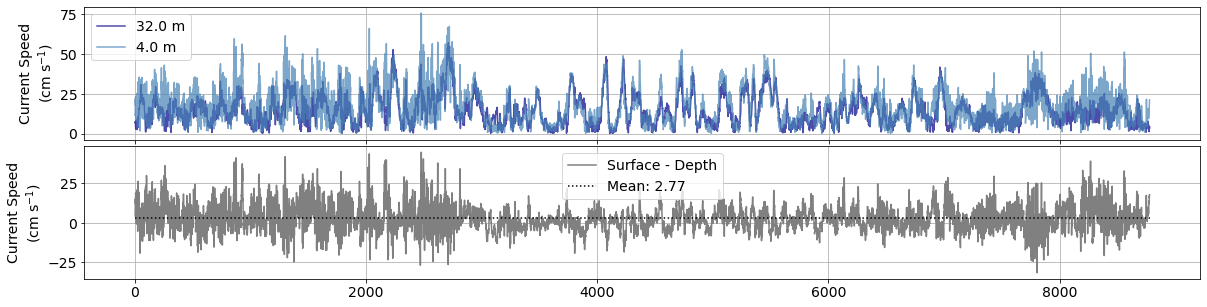

In [93]:
bigDs = pmelTransport(D1_4)
bigDs = bigDs[1]

fig = plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':14})

fig.add_subplot(2,1,1)
ct=0
col = ['darkblue','steelblue']
for d in [bigDs.depth.values.max(),bigDs.depth.values.min()]:
    deep = bigDs.sel(depth=d)
    (np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s'))),color=col[ct],alpha=0.7)
    ct+=1
plt.grid()
plt.legend([str(bigDs.depth.values.max())+' m',str(bigDs.depth.values.min())+' m'])
plt.ylabel('Current Speed\n(cm s$^{-1}$)')

fig.add_subplot(2,1,2)
curDs = bigDs.sel(depth=bigDs.depth.values.max())
d = np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s')))
curDs = bigDs.sel(depth=bigDs.depth.values.min())
s = np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s')))
plt.plot(s-d,color='grey')
plt.hlines(np.nanmean(s-d).magnitude,0,len(s.magnitude),color='k',linestyle=':',zorder=4)
plt.grid()
plt.ylabel('Current Speed\n(cm s$^{-1}$)')
plt.legend(['Surface - Depth','Mean: '+str(np.round(np.nanmean(s-d).magnitude,2))])
plt.subplots_adjust(hspace=0.05)

<Figure size 1296x576 with 0 Axes>

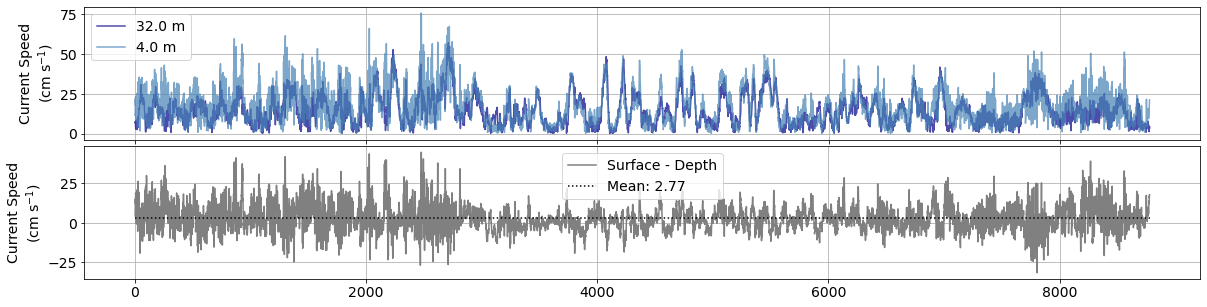

In [92]:
bigDs = pmelTransport(D1_4)
bigDs = bigDs[1]

fig = plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':14})

fig.add_subplot(2,1,1)
ct=0
col = ['darkblue','steelblue']
for d in [bigDs.depth.values.max(),bigDs.depth.values.min()]:
    curDs = bigDs.sel(depth=d)
    plt.plot(np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s'))),color=col[ct],alpha=0.7)
    ct+=1
plt.grid()
plt.legend([str(bigDs.depth.values.max())+' m',str(bigDs.depth.values.min())+' m'])
plt.ylabel('Current Speed\n(cm s$^{-1}$)')

fig.add_subplot(2,1,2)
curDs = bigDs.sel(depth=bigDs.depth.values.max())
d = np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s')))
curDs = bigDs.sel(depth=bigDs.depth.values.min())
s = np.ravel(mp.wind_speed(np.ravel(curDs.u_1205)*units('cm/s'),np.ravel(curDs.v_1206)*units('cm/s')))
plt.plot(s-d,color='grey')
plt.hlines(np.nanmean(s-d).magnitude,0,len(s.magnitude),color='k',linestyle=':',zorder=4)
plt.grid()
plt.ylabel('Current Speed\n(cm s$^{-1}$)')
plt.legend(['Surface - Depth','Mean: '+str(np.round(np.nanmean(s-d).magnitude,2))])
plt.subplots_adjust(hspace=0.05)

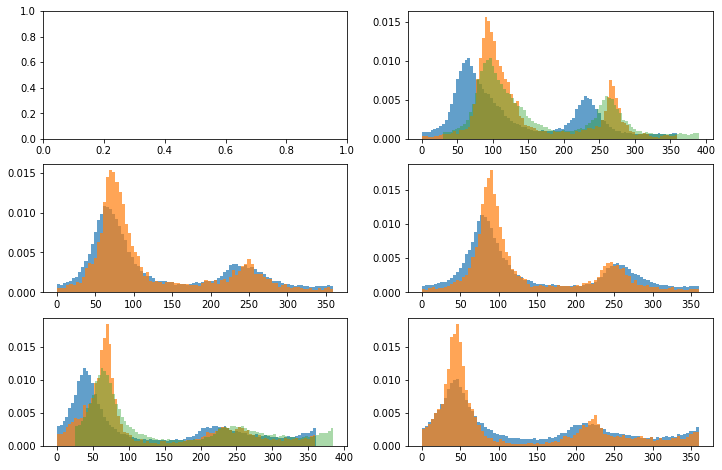

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [4]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(12,8))

bigDs = pmelTransport(D6)
curADCP = bigDs[0].sel(depth=24)
ax2.hist(df6.linearHead,bins=90,density=True,alpha=0.7);
ax2.hist(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')).magnitude,bins=90,density=True,alpha=0.7);
ax2.hist(df6.linearHead+30,bins=90,density=True,alpha=0.4);

bigDs = pmelTransport(D2_5)
curADCP = bigDs[0].sel(depth=24)
ax3.hist(df2.linearHead,bins=90,density=True,alpha=0.7);
ax3.hist(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')).magnitude,bins=90,density=True,alpha=0.7);

curADCP = bigDs[1].sel(depth=24)
ax4.hist(df5.linearHead,bins=90,density=True,alpha=0.7);
ax4.hist(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')).magnitude,bins=90,density=True,alpha=0.7);

bigDs = pmelTransport(D1_4)
curADCP = bigDs[0].sel(depth=24)
ax5.hist(df1.linearHead,bins=90,density=True,alpha=0.7);
ax5.hist(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')).magnitude,bins=90,density=True,alpha=0.7);
ax5.hist(df1.linearHead+25,bins=90,density=True,alpha=0.4);

curADCP = bigDs[1].sel(depth=24)
ax6.hist(df4.linearHead,bins=90,density=True,alpha=0.7);
ax6.hist(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')).magnitude,bins=90,density=True,alpha=0.7);

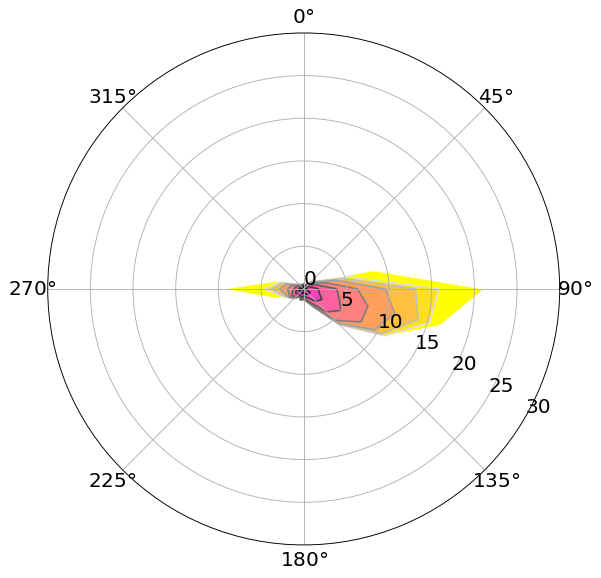

In [54]:
#bigDs = pmelTransport([D6[0]])
plotADCP(bigDs)

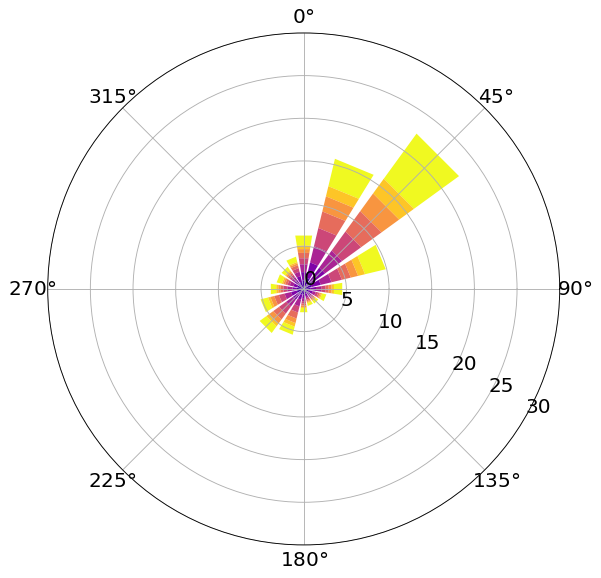

<Figure size 1296x576 with 0 Axes>

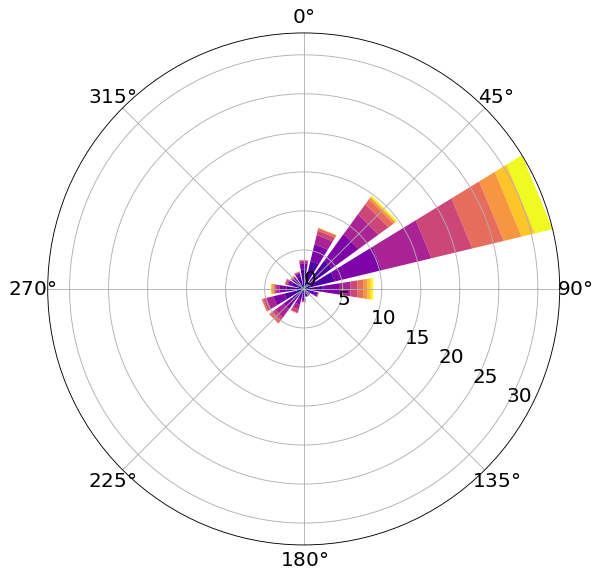

In [2]:
plotTracks(df1)
bigDs = pmelTransport([D1_4[0]])
plotADCP(bigDs)

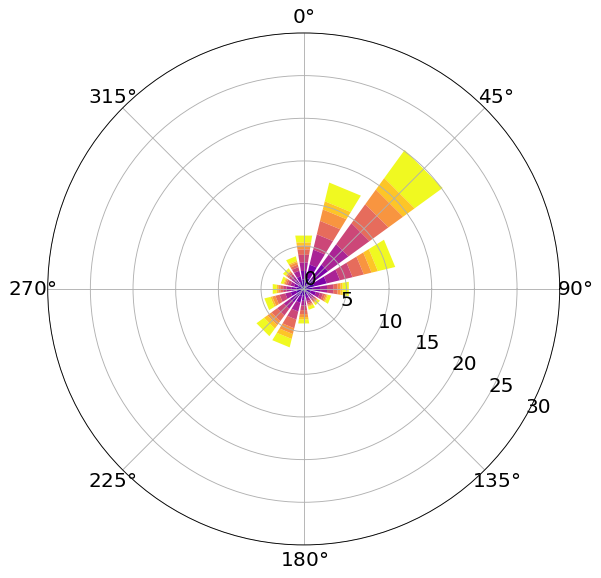

<Figure size 1296x576 with 0 Axes>

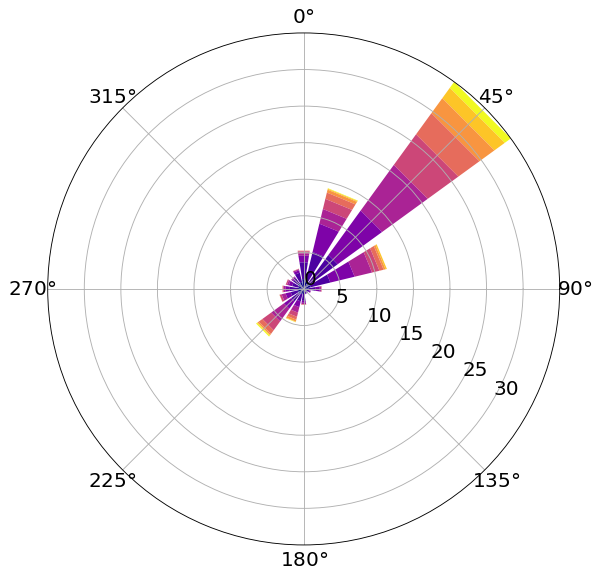

In [5]:
plotTracks(df4)
bigDs = pmelTransport([D1_4[1]])
plotADCP(bigDs)

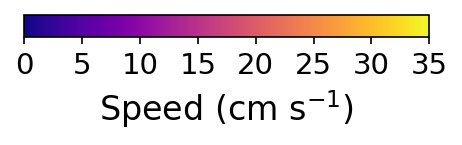

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3, 1),dpi=150)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])


cmap = plt.cm.plasma  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
norm = mpl.colors.Normalize(vmin=0, vmax=35)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Speed (cm s$^{-1}$)',fontsize=16)
cb1.set_ticks([0,5,10,15,20,25,30,35])
cb1.ax.tick_params(labelsize=14)

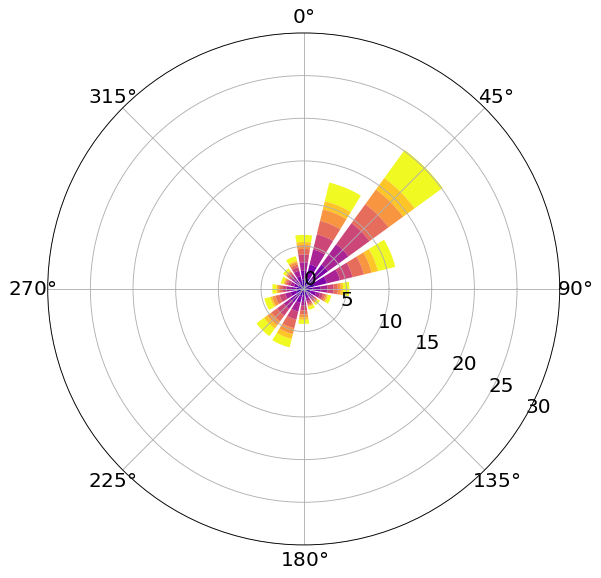

<Figure size 1296x576 with 0 Axes>

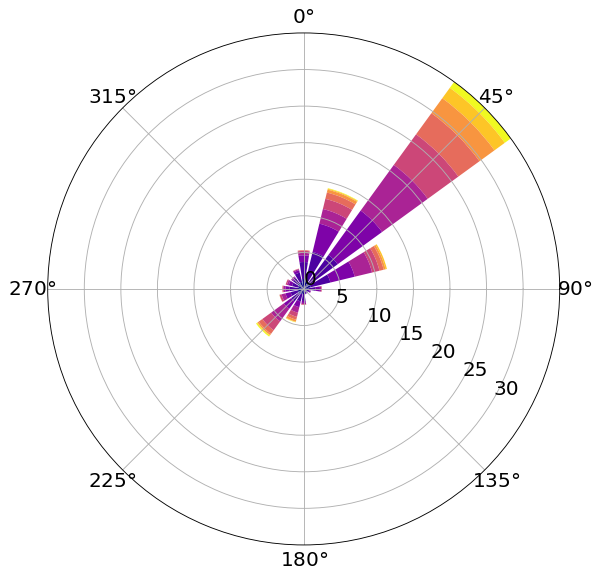

In [111]:
plotTracks(df4)
bigDs = pmelTransport([D1_4[1]])
plotADCP(bigDs)

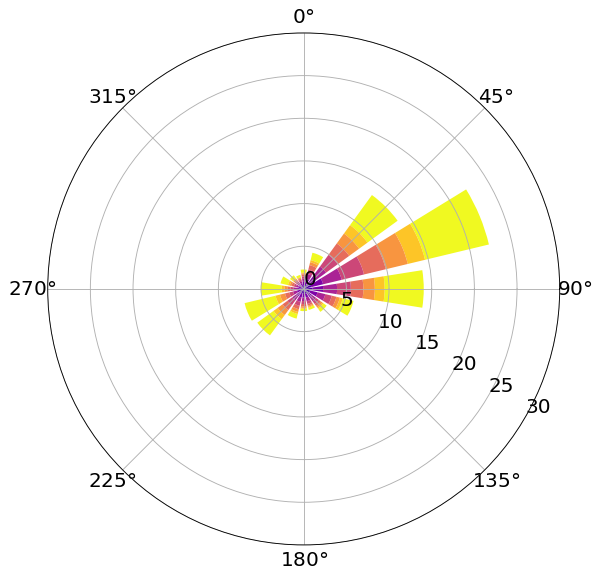

<Figure size 1296x576 with 0 Axes>

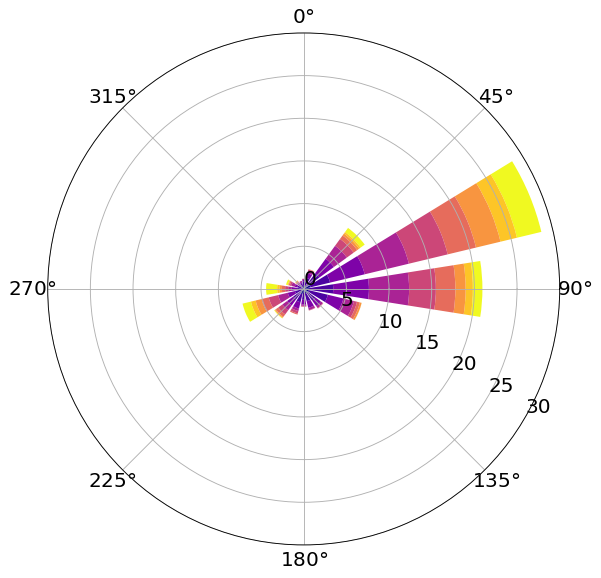

In [24]:
plotTracks(df2)
bigDs = pmelTransport([D2_5[0]])
plotADCP(bigDs)

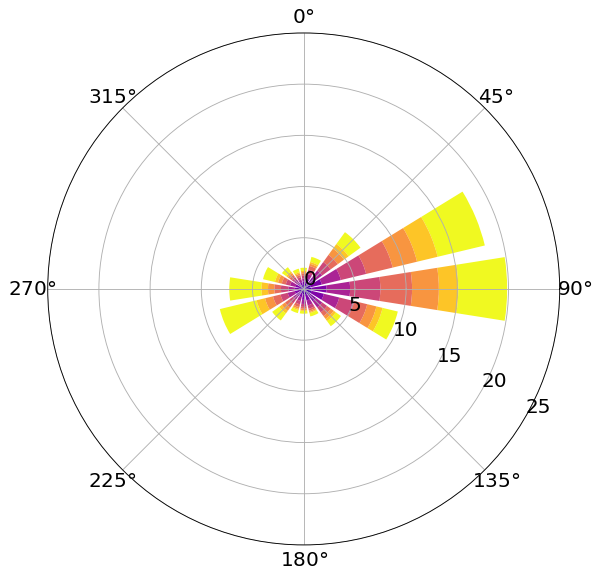

<Figure size 1296x576 with 0 Axes>

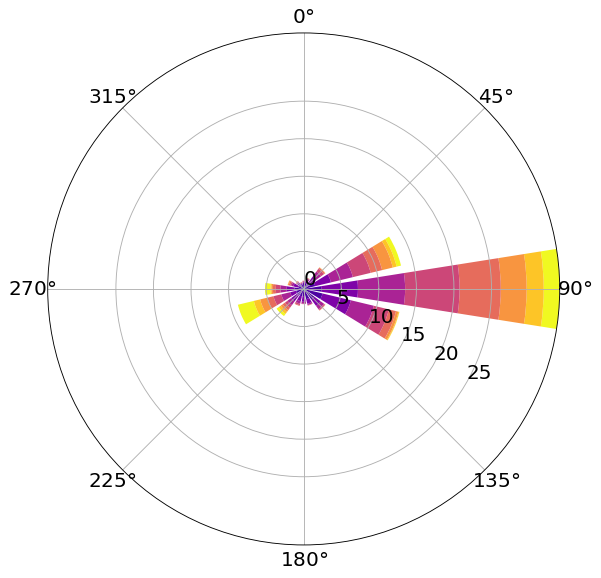

In [92]:
plotTracks(df5)
bigDs = pmelTransport([D2_5[1]])
plotADCP(bigDs)

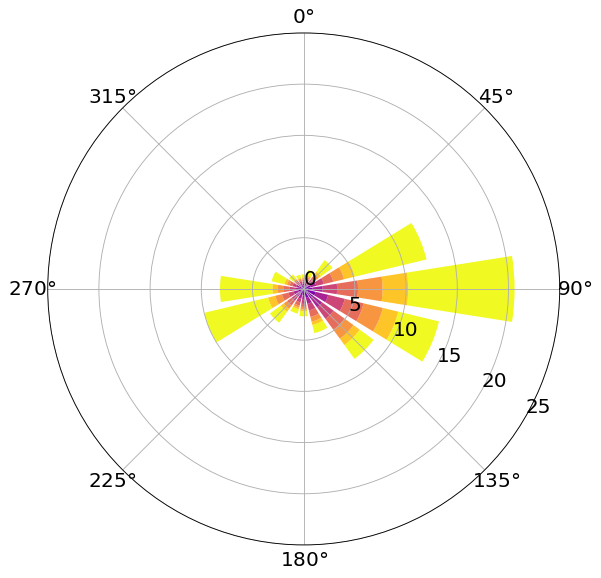

<Figure size 1296x576 with 0 Axes>

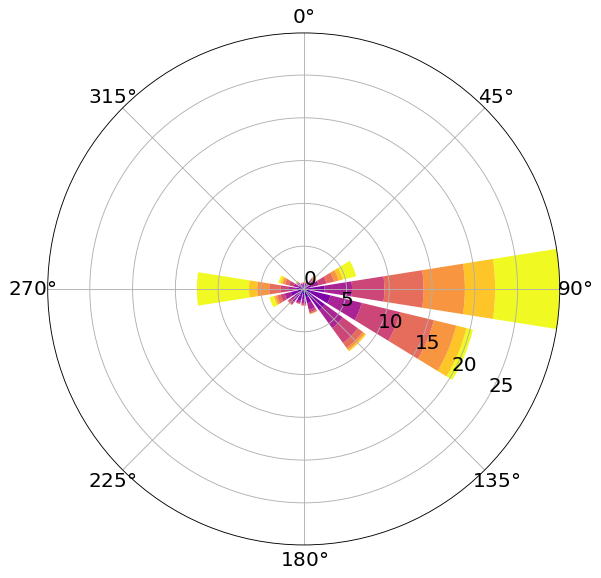

In [79]:
plotTracks(dfC4)
bigDs = pmelTransport(D6)
plotADCP(bigDs)

<Figure size 1296x576 with 0 Axes>

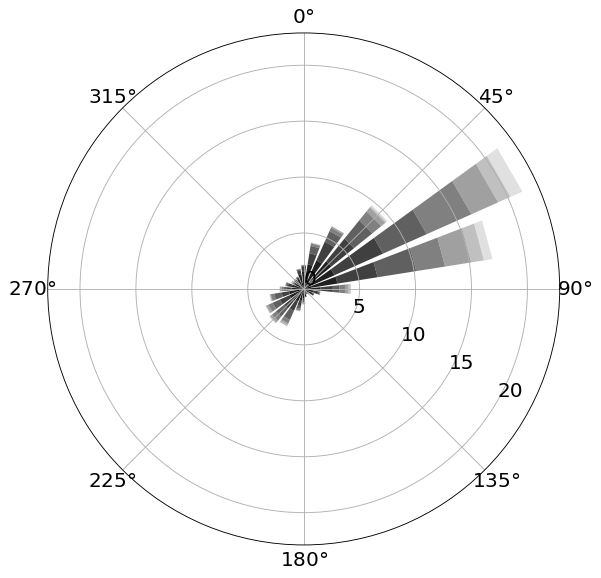

In [11]:
import cmocean
def plotCombined(bigDS,dfCur):
    d = []
    speed = []
    for i in range(len(bigDs)):
        curADCP = bigDs[i].sel(depth=32)#,time3=slice("2018-07-01", "2019-09-30"))
        d.append(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')))
        speed.append(np.ravel(mp.wind_speed(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'))))
    ax = WindroseAxes.from_ax()
    #ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude,  bins=np.arange(0, 5, 100), cmap=cm.Greys_r)
    ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude, normed=True,bins=np.arange(0, 41, 5), nsector=24,cmap=cm.gray)
    #ax.bar(dfCur.directHead, dfCur.directSpeed*100, normed=True,bins=np.arange(0, 41, 5), nsector=24,cmap=cm.Oranges)
    #ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude, normed=True,bins=np.arange(0, 41, 5), nsector=24,cmap=cm.GnBu,alpha=0.7)
    
    ax.set_yticks([0,5,10,15,20,])
    ax.set_yticklabels(['0','5','10','15','20'],fontsize=14)
    ax.set_rlabel_position(330)
    #ax.set_theta_zero_location("N")  # theta=0 at the top
    #ax.set_theta_direction(-1)  # theta increasing clockwise
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    ax.set_xticklabels(['90${\degree}$', '45${\degree}$', '0${\degree}$', '315${\degree}$', '270${\degree}$', '225${\degree}$', '180${\degree}$', '135${\degree}$']);


bigDs = pmelTransport([D1_4[0]])
plotCombined(bigDs,df1)

Try making a movie

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from tqdm.notebook import tqdm
from datetime import timedelta
import matplotlib.animation as manimation
import base64
from IPython.display import HTML

vidFile = "Weekly2.mp4"

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Trajectories', artist='ME!')
writer = FFMpegWriter(fps=5, metadata=metadata,bitrate=10000)


#df4 = df4.reset_index()
#df1 = df1.reset_index()
dfC = pd.concat([df1,df4])
dfC = dfC.sort_values(by='Datetime')
bigDs = pmelTransport(D1_4)
d = []
speed = []
for i in range(len(bigDs)):
    curADCP = bigDs[i].sel(depth=32)#,time3=slice("2018-07-01", "2019-09-30"))
    d.append(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')))
    speed.append(np.ravel(mp.wind_speed(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'))))
dfADCP = pd.DataFrame({'Datetime':pd.to_datetime(np.concatenate([bigDs[0].time3.values,bigDs[1].time3.values])),'Direction':np.concatenate(d).magnitude,'Speed':np.concatenate(speed).magnitude})


fig = plt.figure(figsize=(14,6),dpi=300)
with writer.saving(fig, vidFile, dpi=300):
    for i in tqdm(range(2,725)):#2,725
        ax1 = fig.add_subplot(121, projection="windrose")
        #dfCur = dfC[(dfC.Datetime.dt.date == dfC.Datetime.dt.date.unique()[i])]
        dfCur = dfC[(dfC.Datetime.dt.date >= dfC.Datetime.dt.date.unique()[i]) & (dfC.Datetime.dt.date < dfC.Datetime.dt.date.unique()[i]+timedelta(days=7))]
        ax = WindroseAxes.from_ax(ax=ax1)
        ax.bar(dfCur.directHead, dfCur.directSpeed*100, normed=True,bins=np.arange(0, 41, 5), cmap=cm.plasma)
        ax.set_yticks([0,10,20,30,40])
        ax.set_yticklabels(['0','10','20','30', '40'],fontsize=14)
        ax.set_rlabel_position(330)
        #ax.set_theta_zero_location("N")  # theta=0 at the top
        #ax.set_theta_direction(-1)  # theta increasing clockwise
        #xlabels = ('N','N-E','E','S-E','S','S-O','O','N-O')
        #ax.set_xticklabels(xlabels);
        #ax.set_xticks(xticks)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        ax.set_xticklabels(['90${\degree}$', '45${\degree}$', '0${\degree}$', '315${\degree}$', '270${\degree}$', '225${\degree}$', '180${\degree}$', '135${\degree}$']);
        plt.title('Fish',fontsize=18);
        #plt.suptitle(dfCur.Datetime.dt.strftime('%d').unique()[0]+' '+dfCur.Datetime.dt.strftime('%b').unique()[0]+' '+str(dfCur.Datetime.dt.year.unique()[0]),fontsize=18);
        plt.suptitle(dfCur.Datetime.dt.strftime('%b').unique()[0]+' '+str(dfCur.Datetime.dt.year.unique()[0]),fontsize=18);
        ax2 = fig.add_subplot(122, projection="windrose")
        #dfCur = dfADCP[(dfADCP.Datetime.dt.date == dfC.Datetime.dt.date.unique()[i])]
        dfCur = dfADCP[(dfADCP.Datetime.dt.date >= dfC.Datetime.dt.date.unique()[i]) & (dfADCP.Datetime.dt.date < dfC.Datetime.dt.date.unique()[i]+timedelta(days=7))]
        ax = WindroseAxes.from_ax(ax=ax2)
        ax.bar(dfCur.Direction, dfCur.Speed, normed=True,bins=np.arange(0, 41, 5), cmap=cm.plasma)
        ax.set_yticks([0,25,50,75])
        ax.set_yticklabels(['0','25','50','75'],fontsize=14)
        ax.set_rlabel_position(330)
        #ax.set_theta_zero_location("N")  # theta=0 at the top
        #ax.set_theta_direction(-1)  # theta increasing clockwise
        #xlabels = ('N','N-E','E','S-E','S','S-O','O','N-O')
        #ax.set_xticklabels(xlabels);
        #ax.set_xticks(xticks)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        ax.set_xticklabels(['90${\degree}$', '45${\degree}$', '0${\degree}$', '315${\degree}$', '270${\degree}$', '225${\degree}$', '180${\degree}$', '135${\degree}$']);
        plt.title('ADCP',fontsize=18);

        writer.grab_frame()
        plt.clf()
        

video = open(vidFile, "rb").read()
encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>
<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))